In [45]:
import pylab
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.special
from scipy.integrate import quad

from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from random import randrange

def graph3Dstep1(func, x1, x2, y1, y2):
    
    global points

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.arange(x1, x2, 1)
    Y = np.arange(y1, y2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = func(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    ax.view_init(10, 300)

    plt.show()
    
    #calculate number of squares
    numsqx = abs(x1 - x2)
    numsqy = abs(y1 - y2)

    #make array of cumulative values
    sum1 = np.ones((numsqx,numsqy))
    sum3 = np.zeros((numsqx,numsqy))
    sum4 = 0
    for i in range(numsqx):
        for j in range(numsqy):
            sum1[i][j] = func(Y[i][j],X[i][j])
            sum4 += sum1[i][j]
            sum3[i][j] += sum4
            
    xx = []    
    for i in range(x1,x2,1):
        xx.append(i)
        
    yy = []
    for i in range(y1,y2,1):
        yy.append(i)

    #Find first cell that satisfies the condition
    points = []
    def genval(x):
        global points
        for y in range(x):
    #         r1 = 89.99999999999922*sum3[8][19]/100000
            r2 = round(sum3[numsqy-1][numsqx-1])
            r3 = randrange(r2)

#             print(r3)
            #find cell for this number
            k=0
            for i in range(numsqy):
                for j in range(numsqx):
                    if sum3[i][j]>r3:
#                         print(sum3[i][j])
#                         print(" {} {} ".format(i,j))
                        points.append((xx[i],yy[j]))
                        k = 1
                        break
                if k==1:
                    break
                    
    
    genval(10000)
    
    pointsx = []
    pointsy = []

    for i in points:
        pointsx.append(i[0])
        pointsy.append(i[1])
        
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    hist, xedges, yedges = np.histogram2d(pointsx, pointsy, bins=6, range=[[y1, y2], [x1, x2]])

    # Construct arrays for the anchor positions of the 16 bars.
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the 16 bars.
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

    plt.show()


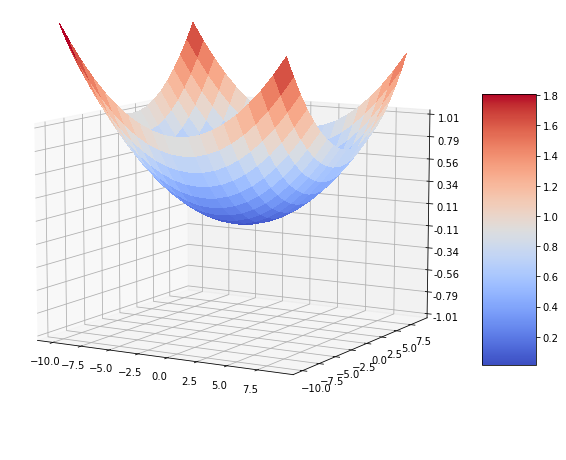

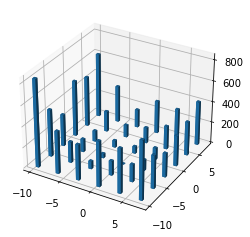

In [46]:
graph3Dstep1(lambda p1, p2: (p1**2 + p2**2)/100 , -10, 10, -10, 10)

In [20]:
points

[(5, 19),
 (3, 8),
 (17, 2),
 (7, 16),
 (1, 10),
 (6, 0),
 (19, 6),
 (4, 0),
 (4, 0),
 (15, 16),
 (18, 4),
 (2, 14),
 (12, 19),
 (3, 19),
 (2, 3),
 (10, 14),
 (4, 17),
 (14, 1),
 (14, 19),
 (10, 4),
 (9, 16),
 (0, 0),
 (0, 0),
 (2, 13),
 (3, 4),
 (13, 16),
 (18, 8),
 (3, 6),
 (12, 18),
 (9, 18),
 (1, 0),
 (17, 8),
 (1, 12),
 (19, 18),
 (2, 11),
 (0, 5),
 (5, 2),
 (0, 13),
 (19, 18),
 (2, 11),
 (17, 17),
 (1, 16),
 (18, 14),
 (19, 5),
 (0, 14),
 (0, 8),
 (18, 11),
 (0, 0),
 (6, 18),
 (7, 0),
 (0, 18),
 (4, 16),
 (10, 0),
 (2, 0),
 (1, 19),
 (2, 17),
 (1, 9),
 (17, 18),
 (18, 1),
 (19, 6),
 (2, 13),
 (17, 16),
 (0, 13),
 (10, 19),
 (18, 19),
 (0, 4),
 (19, 7),
 (3, 14),
 (0, 8),
 (4, 7),
 (18, 19),
 (1, 17),
 (18, 19),
 (0, 4),
 (14, 18),
 (6, 12),
 (16, 18),
 (18, 15),
 (15, 1),
 (14, 9),
 (17, 6),
 (3, 2),
 (9, 16),
 (13, 1),
 (0, 6),
 (1, 1),
 (11, 4),
 (6, 2),
 (1, 19),
 (15, 0),
 (18, 11),
 (2, 4),
 (0, 5),
 (10, 4),
 (4, 4),
 (18, 19),
 (2, 19),
 (18, 7),
 (0, 15),
 (15, 3),
 (8, 4

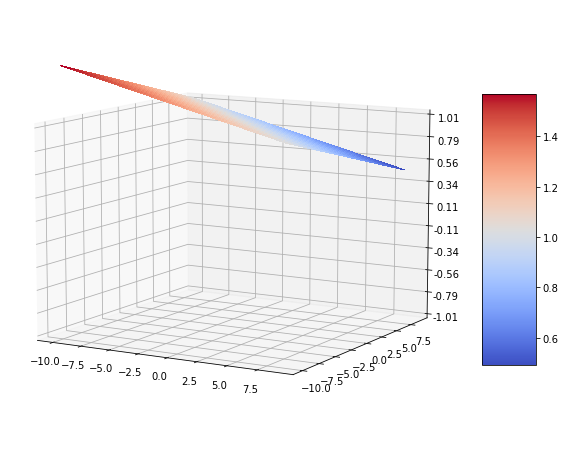

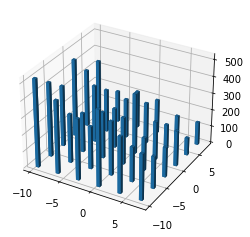

In [53]:
graph3Dstep1(lambda p1, p2: (-0.03*p1 -0.03*p2)+1, -10, 10, -10, 10)